In [651]:
import pandas as pd

In [652]:
housing=pd.read_csv("data.csv")

In [653]:
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [654]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [655]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [656]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [657]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [658]:
%matplotlib inline

In [659]:
import matplotlib.pyplot as plt

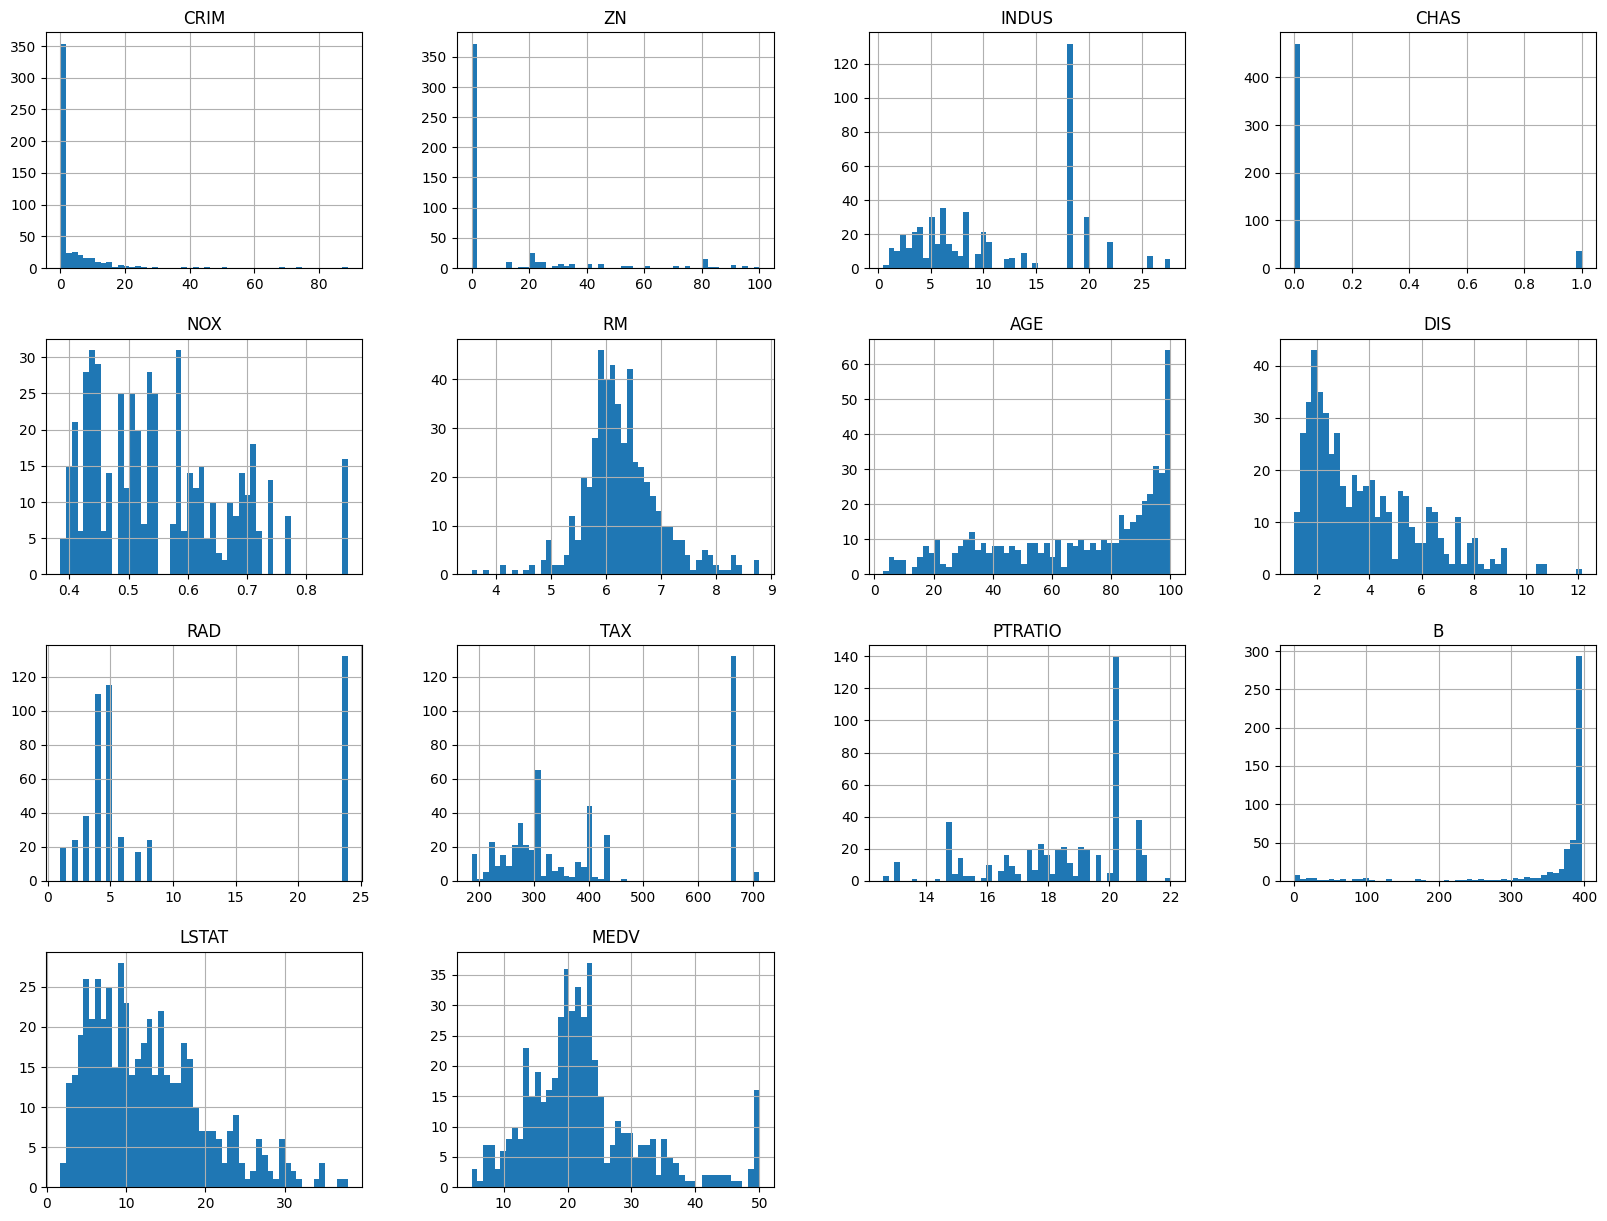

In [660]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

Train-Test-Splitting

In [661]:
from sklearn.model_selection import train_test_split

In [662]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print("Rows in train set :",len(train_set))
print("rows in test set :",len(test_set)) 

Rows in train set : 404
rows in test set : 102


In [663]:
from sklearn.model_selection import StratifiedShuffleSplit


In [664]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [665]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [666]:

strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [667]:
housing=strat_train_set.copy()

Looking for Correlations

In [669]:
corr_matrix=housing.corr()

In [670]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [671]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()


Missing Atributes

In [672]:
housing.dropna(subset=["RM"]).shape

(399, 13)

In [673]:
median=housing["RM"].median()
median

6.209

In [674]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [675]:
housing.shape

(404, 13)

In [676]:
housing.describe()##before filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [677]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [678]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [679]:
x=imputer.transform(housing)
housing_tr=pd.DataFrame(x,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


Creating a Pipeline

In [680]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [681]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [682]:
print(housing_num_tr)
housing_num_tr.shape

[[-0.43942006  3.12628155 -1.12165014 ... -0.97491834  0.41164221
  -0.86091034]
 [-0.44352175  3.12628155 -1.35893781 ... -0.69277865  0.39131918
  -0.94116739]
 [ 0.15682292 -0.4898311   0.98336806 ...  0.81196637  0.44624347
   0.81480158]
 ...
 [-0.43525657 -0.4898311  -1.23083158 ... -0.22254583  0.41831233
  -1.27603303]
 [ 0.14210728 -0.4898311   0.98336806 ...  0.81196637 -3.15239177
   0.73869575]
 [-0.43974024 -0.4898311   0.37049623 ... -0.97491834  0.41070422
   0.09940681]]


(404, 13)

Selecting a desired model

In [683]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# model=LinearRegression()
model=DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)


DecisionTreeRegressor()

In [684]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [685]:
prepared_data=my_pipeline.transform(some_data)

In [686]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [687]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

evaluating the values

In [688]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.0

Using better evaluation tchniqe - Cross Validation

In [689]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores


array([3.86879322, 5.77494589, 5.21211066, 3.7850476 , 4.03255502,
       3.04598096, 4.9169096 , 3.71678625, 3.5182382 , 4.07924625])

In [690]:
def print_scores(scores):
    print("scores: ",scores)
    print("mean: ",scores.mean())
    print("sd: ",scores.std())

In [691]:
print_scores(rmse_scores)

scores:  [3.86879322 5.77494589 5.21211066 3.7850476  4.03255502 3.04598096
 4.9169096  3.71678625 3.5182382  4.07924625]
mean:  4.195061364767338
sd:  0.7983166890904251


Testing the model

In [692]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

4.110269300847597

In [693]:
print(final_predictions,list(Y_test))

[29.8 10.9 29.1 23.3 20.  13.9 22.4 11.3 32.7 43.8 22.4 10.9 21.6 20.8
 19.  11.5 32.7 14.8 24.7 15.  19.6 14.3 10.9 21.7 16.1 35.1 17.1 35.1
 10.2 32.7 20.  20.6 23.9 10.9 22.3  8.3 48.8 25.2 23.1 46.  25.  23.3
 19.5 19.6 15.2 31.7 48.3 19.  20.1 23.1 24.5 13.1 21.7 17.1 28.6 31.7
 37.6 31.5 17.4 19.  50.   5.6 17.5 23.9 17.4 28.7 17.4 13.4 21.4 36.2
 24.3 22.6 18.5 21.4 32.7 13.3 16.4 18.2 19.  22.  23.9 19.  13.4 23.9
 23.3 21.2  9.7 20.3 18.9 20.7 17.5 22.9  6.3 26.6 21.9 31.1 24.5 28.7
  8.5 29.4 22.  27.1] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.

In [694]:
features=np.array([[
    -0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034
]])
model.predict(features)

array([21.9])